In [19]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import os 
import h5py
import scipy.stats 
import sys
%matplotlib inline  


# os.chdir('./../../../../../data/hongtao')
be = h5py.File('./../../../../../data/hongtao/variables_tt_re.h5','r')
bmu = h5py.File('./../../../../../data/hongtao/variables_tt_rmu.h5','r')
be1 = h5py.File('./../../../../../data/hongtao/variables_tt_re1.h5','r')
print(be.keys())
print('')
print(be1.keys())
dataset = be1

<KeysViewHDF5 ['j1_eta', 'j1_isbtag', 'j1_m', 'j1_phi', 'j1_pt', 'j2_eta', 'j2_isbtag', 'j2_m', 'j2_phi', 'j2_pt', 'j3_eta', 'j3_isbtag', 'j3_m', 'j3_phi', 'j3_pt', 'j4_eta', 'j4_isbtag', 'j4_m', 'j4_phi', 'j4_pt', 'j5_eta', 'j5_isbtag', 'j5_m', 'j5_phi', 'j5_pt', 'j6_eta', 'j6_isbtag', 'j6_m', 'j6_phi', 'j6_pt', 'j7_eta', 'j7_isbtag', 'j7_m', 'j7_phi', 'j7_pt', 'j8_eta', 'j8_isbtag', 'j8_m', 'j8_phi', 'j8_pt', 'lep_eta', 'lep_m', 'lep_phi', 'lep_pt', 'met_met', 'met_phi', 'mttReco', 'mttTrue']>

<KeysViewHDF5 ['bh_eta', 'bh_phi', 'bh_pt', 'bl_eta', 'bl_phi', 'bl_pt', 'j1_DL1r', 'j1_eta', 'j1_isbtag', 'j1_m', 'j1_phi', 'j1_pt', 'j2_DL1r', 'j2_eta', 'j2_isbtag', 'j2_m', 'j2_phi', 'j2_pt', 'j3_DL1r', 'j3_eta', 'j3_isbtag', 'j3_m', 'j3_phi', 'j3_pt', 'j4_DL1r', 'j4_eta', 'j4_isbtag', 'j4_m', 'j4_phi', 'j4_pt', 'j5_DL1r', 'j5_eta', 'j5_isbtag', 'j5_m', 'j5_phi', 'j5_pt', 'j6_DL1r', 'j6_eta', 'j6_isbtag', 'j6_m', 'j6_phi', 'j6_pt', 'j7_DL1r', 'j7_eta', 'j7_isbtag', 'j7_m', 'j7_phi', 'j7_pt'

In [20]:
input_keys = ['j1_pt', 'j1_eta', 'j1_phi', 'j1_m', 'j1_DL1r', 'j2_pt', 'j2_eta', 'j2_phi', 'j2_m', 'j2_DL1r', 'j3_pt', 'j3_eta', 'j3_phi', 'j3_m', 'j3_DL1r', 'j4_pt', 'j4_eta', 'j4_phi', 'j4_m', 'j4_DL1r', 'j5_pt', 'j5_eta', 'j5_phi', 'j5_m', 'j5_DL1r', 'j6_pt', 'j6_eta', 'j6_phi', 'j6_m', 'j6_DL1r', 'j7_pt', 'j7_eta', 'j7_phi','j7_m', 'j7_DL1r', 'j8_pt', 'j8_eta', 'j8_phi','j8_m', 'j8_DL1r', 'lep_pt', 'lep_eta', 'lep_phi', 'met_met', 'met_phi'] 
output_keys = ['th_pt', 'th_eta','th_phi', 'tl_pt', 'tl_eta', 'tl_phi']
# output_keys = ['th_eta','th_phi', 'tl_eta', 'tl_phi']

output_length = len(output_keys)
input_length = len(input_keys)

(array([10029., 10081., 10188., 10295., 10102., 10031.,  9837., 10011.,
         9738.,  9688.]),
 array([-3.14158916e+00, -2.51327868e+00, -1.88496819e+00, -1.25665770e+00,
        -6.28347206e-01, -3.67164612e-05,  6.28273773e-01,  1.25658426e+00,
         1.88489475e+00,  2.51320524e+00,  3.14151573e+00]),
 <a list of 1 Patch objects>)

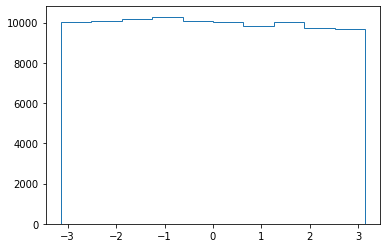

In [21]:
plt.hist(dataset.get('met_phi')[0:100000], histtype='step')

In [54]:
i = 'th_phi' 
var = dataset.get(i)
v2 = var-np.mean(var)
v3 = v2/np.max(v2)/2+0.5
v3 = v3[0:100000]


(array([10017., 10116., 10141.,  9844.,  9823., 10092.,  9969., 10001.,
        10051.,  9946.]),
 array([-6.83028280e-04,  9.93852708e-02,  1.99453570e-01,  2.99521869e-01,
         3.99590168e-01,  4.99658467e-01,  5.99726766e-01,  6.99795065e-01,
         7.99863364e-01,  8.99931663e-01,  9.99999962e-01]),
 <a list of 1 Patch objects>)

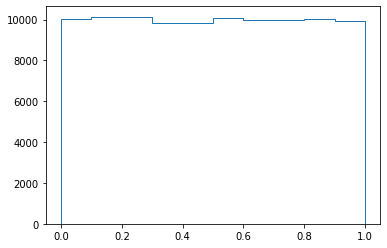

In [55]:
plt.hist(v3, histtype='step')


(array([ 9976.,  9958., 10021., 10063., 10049., 10029.,  9883., 10076.,
         9964.,  9981.]),
 array([6.09172499e-06, 1.00003917e-01, 2.00001743e-01, 2.99999568e-01,
        3.99997394e-01, 4.99995219e-01, 5.99993045e-01, 6.99990870e-01,
        7.99988696e-01, 8.99986521e-01, 9.99984347e-01]),
 <a list of 1 Patch objects>)

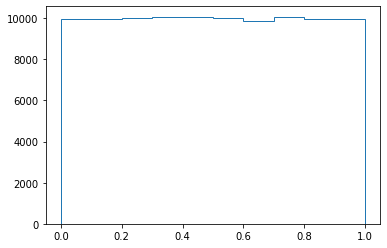

In [43]:
uni = np.random.uniform(low=0, high=1, size=100000)
plt.hist(uni, histtype='step')

(array([2.1000e+01, 3.9400e+02, 3.1140e+03, 1.3419e+04, 2.8867e+04,
        3.1516e+04, 1.7272e+04, 4.7080e+03, 6.4600e+02, 4.3000e+01]),
 array([-4.37427896, -3.52047656, -2.66667417, -1.81287177, -0.95906937,
        -0.10526697,  0.74853543,  1.60233783,  2.45614023,  3.30994262,
         4.16374502]),
 <a list of 1 Patch objects>)

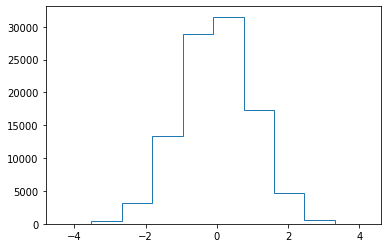

In [56]:
normal = scipy.stats.norm.pdf(uni)
invnormal = scipy.stats.norm.ppf(uni)
uni1 = scipy.stats.norm.cdf(invnormal)

# plt.plot(uni, normal)

plt.hist(invnormal, histtype='step')


In [16]:
x, y = v3, uni
s = x**2 + y**2 

z1 = x/np.sqrt(s)*np.sqrt(-2*np.log(s))
z2 = y/np.sqrt(s)*np.sqrt(-2*np.log(s))

z = np.append(z1, z2)
max1 = np.max(np.abs(z))
z = z/(max1)

(array([1.0500e+02, 2.2590e+03, 2.4258e+04, 4.9484e+04, 2.5945e+04,
        3.1894e+04, 4.8002e+04, 1.6614e+04, 1.3930e+03, 4.6000e+01]),
 array([-0.96369148, -0.76732233, -0.57095318, -0.37458404, -0.17821489,
         0.01815426,  0.21452341,  0.41089256,  0.6072617 ,  0.80363085,
         1.        ]),
 <a list of 1 Patch objects>)

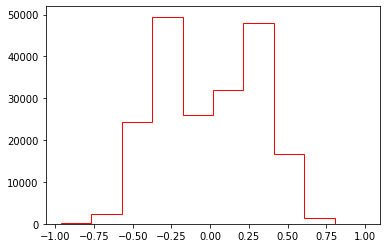

In [17]:
plt.hist(z, histtype='step', color='r')

In [8]:
z1, z2 = z[0:len(v3)//2]*max1, z[len(v3)//2:]*max1
s1 = np.exp(-1*(z1**2+z2**2)/2)
x1 = z1*np.sqrt(s1)/np.sqrt(-2*np.log(s1))
y1 = z2*np.sqrt(s1)/np.sqrt(-2*np.log(s1))

In [9]:
v = np.append(x1, y1)
v = v*np.max(v2)*2.2+np.mean(var)

(array([10029., 10081., 10188., 10295., 10102., 10031.,  9837., 10011.,
         9738.,  9688.]),
 array([-3.14158916e+00, -2.51327868e+00, -1.88496819e+00, -1.25665770e+00,
        -6.28347206e-01, -3.67164612e-05,  6.28273773e-01,  1.25658426e+00,
         1.88489475e+00,  2.51320524e+00,  3.14151573e+00]),
 <a list of 1 Patch objects>)

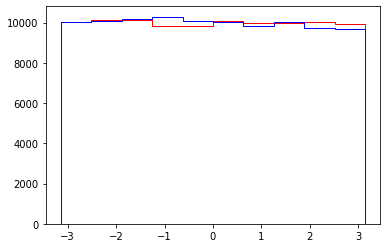

In [10]:
plt.hist(v, histtype='step', color='r')
plt.hist(dataset.get('met_phi')[0:100000], histtype='step', color='b')

In [11]:
def phi_transform(arr):
    mean = np.mean(arr)
    arr = arr-mean
    max0 = np.max(arr)
    arr = arr/max0/2+0.5
    z = stats.norm.ppf(arr)
    return (z, max0, mean)

def invphi_transform(z, max0, mean):
    arr = stats.norm.cdf(z)
    arr = (arr-0.5)*max0+mean
    return arr 

def meanmax_transform(arr):
    mean = np.mean(arr)
    arr = arr-mean
    max0 = np.max(np.abs(arr))
    z = arr/max0
    return (z, max0, 0, mean)

def invmeanmax_transform(z, max0, max1, mean):
    return z*max0+mean
    

                               
    
    

(array([  20.,  128.,  590., 2166., 4167., 2167.,  613.,  122.,   22.,
           5.]),
 array([-1.77635684e-15, -1.37667655e-15, -9.76996262e-16, -5.77315973e-16,
        -1.77635684e-16,  2.22044605e-16,  6.21724894e-16,  1.02140518e-15,
         1.42108547e-15,  1.82076576e-15,  2.22044605e-15]),
 <a list of 1 Patch objects>)

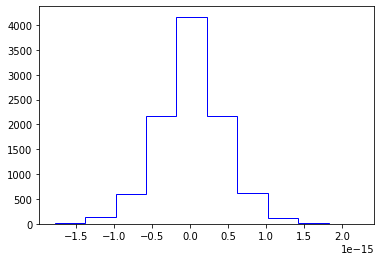

In [59]:
arr = dataset.get('th_phi')[0:10000]
z, max0, max1, mean = phi_transform(arr)
cycle_error = invphi_transform(z, max0, max1, mean) - arr 
# plt.hist(invphi_transform(z, max0, max1, mean), histtype='step', color='r')
# plt.hist(arr, histtype='step', color='b')
plt.hist(cycle_error, histtype='step', color='b')